In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import ppscore as pps
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor as GBR
## for explainer
from lime import lime_tabular

In [16]:
df = pd.read_excel("../State Population Data.xlsx", sheet_name='Final Sheet1')
df = df.drop(labels=['index_sa'], axis=1)
# df = df.rename(columns={"index_nsa":"Y"})
df

,State,Year,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,...,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Total Population,index_nsa
0,Alabama,2010,304257,307242,320124,340821,337744,311118,299420,306591,...,347912,314040,278300,210707,161556,123136,89202,76243,4785437,181.0125
1,Alabama,2011,302829,304649,321557,329841,346596,310059,304263,296399,...,349034,320503,289721,214743,164575,124815,90037,77847,4799069,172.0450
2,Alabama,2012,299235,305676,319783,323788,353544,309846,306693,292521,...,347185,327662,287611,231407,169787,126465,90347,79998,4815588,175.7075
3,Alabama,2013,294695,306917,316872,321016,357045,311691,308008,291555,...,345825,332709,289377,239965,177993,129780,90317,81534,4830081,180.6275
4,Alabama,2014,293559,306192,313817,318331,354397,316637,307809,292616,...,344641,334850,293854,250117,183986,133166,90999,83548,4841799,184.7300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Wyoming,2015,38469,41077,37784,36785,41643,40808,41369,37246,...,38124,42446,38557,30575,20545,14193,9627,10270,585613,319.2800
506,Wyoming,2016,37889,40358,38451,36432,40362,40210,41214,38070,...,35757,41815,39426,32305,21214,14587,9683,10565,584215,322.2875
507,Wyoming,2017,36698,38890,38763,36289,38635,39432,39944,38431,...,33799,40364,40124,32611,23278,15204,9946,10830,578931,327.6575
508,Wyoming,2018,35787,37847,39066,36288,38165,38853,38867,39183,...,32309,39346,40325,33587,24549,16199,10280,10910,577601,339.6875


## 1 - Data Analysis

c:\Users\jerem\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


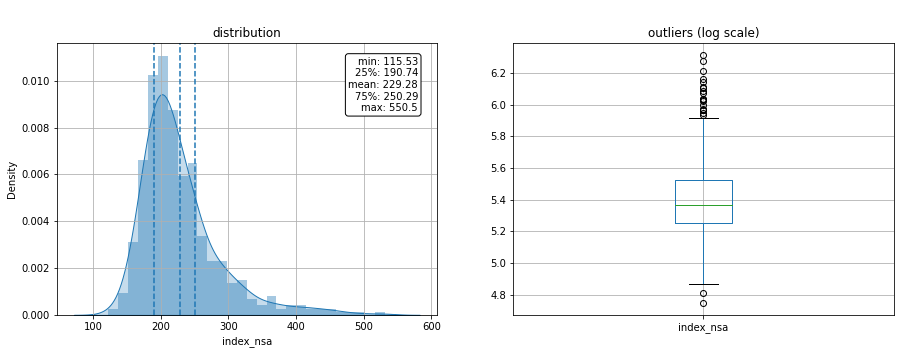

In [17]:
x = "index_nsa"

fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15,5))
fig.suptitle(x, fontsize=20, color="white")

ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

y_value = "index_nsa"
y = y_value

## Used for Testing Indiviual Columns against the Target Variable

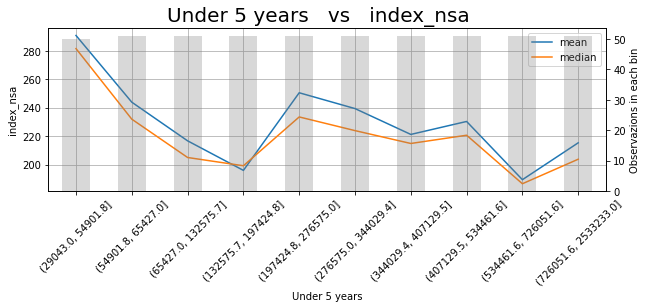

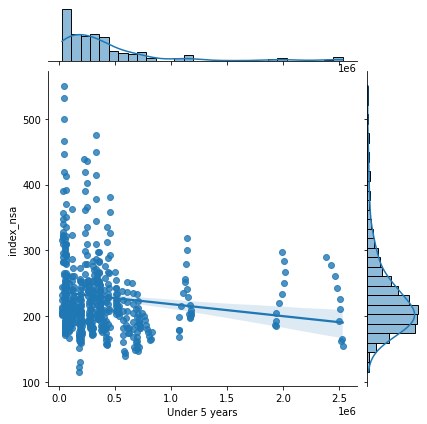

In [29]:
x_value = "Under 5 years"
y_value = "index_nsa"
x, y = x_value, y_value
### bin plot
dtf_noNan = df[df[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=(10,3))
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=df, dropna=True, kind='reg', 
              height=int((10+3)/2) )
plt.show()

In [109]:
x, y = x_value, y_value
dtf_noNan = df[df[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)

#assuming that two variables are independent (null hypothesis)
#it tests whether two samples have a linear relationship. 
# If the p-value is small enough (<0.05), the null hypothesis can be rejected 
# and we can say that the two variables are probably dependent.

conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: -0.001 Non-Significant (p-value: 0.978)


End of individual column testing ---------------------------

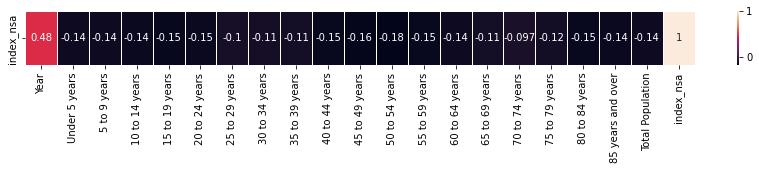

In [20]:
fig, ax = plt.subplots(figsize=(15,1))       
corrMatrix = df.corr(method="pearson")

#Sheet1
sns.heatmap(corrMatrix.iloc[20:21,0:21], annot=True, linewidths=.5, ax=ax)

#Sheet2 and Sheet3
# sns.heatmap(corrMatrix.iloc[14:15,0:15], annot=True, linewidths=.5, ax=ax)
plt.show()

In [21]:
X_train = pd.read_csv("X_train_byState.csv")
X_train = X_train.rename(columns={"Unnamed: 0":"Index"})
X_train = X_train.set_index("Index")

y_train = pd.read_csv("y_train_byState.csv")
y_train = y_train.rename(columns={"Unnamed: 0":"Index"})
y_train = y_train.set_index("Index")

X_test = pd.read_csv("X_test_byState.csv")
X_test = X_test.rename(columns={"Unnamed: 0":"Index"})
X_test = X_test.set_index("Index")

y_test = pd.read_csv("y_test_byState.csv")
y_test = y_test.rename(columns={"Unnamed: 0":"Index"})
y_test = y_test.set_index("Index")

X_train = X_train.drop(labels=['State', 'Year'], axis=1)
X_test = X_test.drop(labels=['State', 'Year'], axis=1)

print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train['index_nsa']),2), "| y_test mean:", round(np.mean(y_test['index_nsa']),2))
print(df.shape[1], "features:", df.drop("index_nsa",axis=1).columns.to_list())

X_train shape: (357, 19) | X_test shape: (153, 19)
y_train mean: 228.18 | y_test mean: 231.86
22 features: ['State', 'Year', 'Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over', 'Total Population']


In [113]:
X_train['Average 15-Year Mortgage Interest Rates'] = X_train['Average 15-Year Mortgage Interest Rates'].fillna(X_train['Average 15-Year Mortgage Interest Rates'].mean())
X_train['Average 30-Year Mortgage Interest Rates'] = X_train['Average 30-Year Mortgage Interest Rates'].fillna(X_train['Average 30-Year Mortgage Interest Rates'].mean())

X_test['Average 15-Year Mortgage Interest Rates'] = X_test['Average 15-Year Mortgage Interest Rates'].fillna(X_test['Average 15-Year Mortgage Interest Rates'].mean())
X_test['Average 30-Year Mortgage Interest Rates'] = X_test['Average 30-Year Mortgage Interest Rates'].fillna(X_test['Average 30-Year Mortgage Interest Rates'].mean())

In [22]:
df_train = X_train
df_train[y] = y_train
df_train

,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Total Population,index_nsa
Index,,,,,,,,,,,,,,,,,,,,
9,294357,297968,310498,313615,322092,338138,309091,304145,289161,308951,307665,336320,321347,275448,225999,155814,101033,91543,4903185,230.0650
4,293559,306192,313817,318331,354397,316637,307809,292616,311572,311708,344641,334850,293854,250117,183986,133166,90999,83548,4841799,184.7300
7,294604,301248,307962,318271,328805,338461,302009,302230,289262,313406,322819,337336,313289,268772,208424,143168,95158,89262,4874486,205.9375
1,302829,304649,321557,329841,346596,310059,304263,296399,314456,337145,349034,320503,289721,214743,164575,124815,90037,77847,4799069,172.0450
0,304257,307242,320124,340821,337744,311118,299420,306591,311590,345434,347912,314040,278300,210707,161556,123136,89202,76243,4785437,181.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,36698,38890,38763,36289,38635,39432,39944,38431,33056,32637,33799,40364,40124,32611,23278,15204,9946,10830,578931,327.6575
501,39577,38170,36132,36889,40873,41138,37978,33267,33610,36778,43547,42001,35087,23759,17200,12690,9611,8992,567299,281.7425
500,40178,37388,35987,37874,40396,41351,36684,33760,33165,39014,43968,41174,33000,23153,16696,12488,9461,8750,564487,281.6500


Feature Selection

Text(0.5, 1.0, 'pearson correlation')

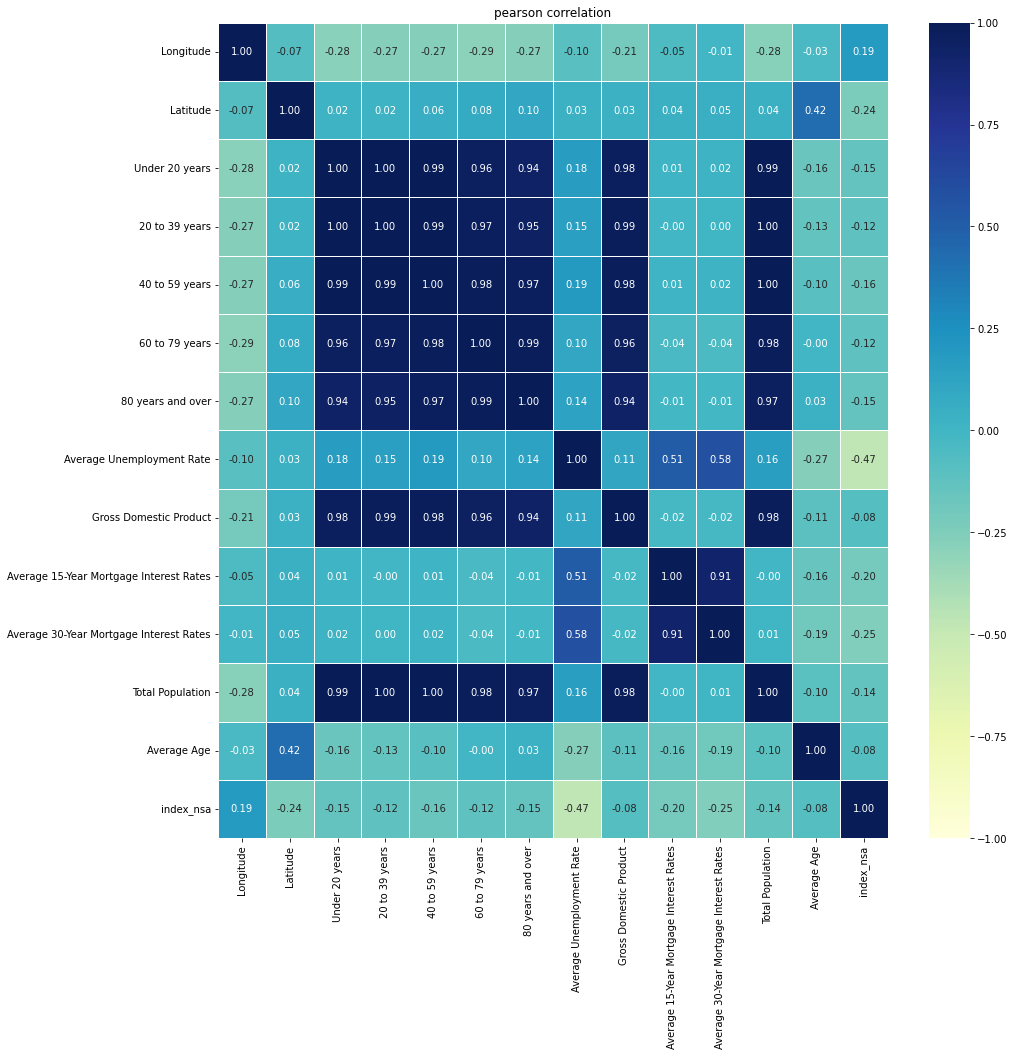

In [115]:
fig, ax = plt.subplots(figsize=(15,15)) 
corr_matrix = df_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)
plt.title("pearson correlation")

c:\Users\jerem\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.27093e-17): result may not be accurate.
  overwrite_a=True).T


<AxesSubplot:xlabel='selection', ylabel='features'>

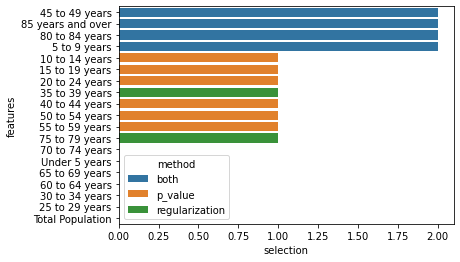

In [23]:
#RIDGE regularization
X = df_train.drop(y, axis=1).values
Y = df_train[y].values
feature_names = df_train.drop(y, axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,Y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,Y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

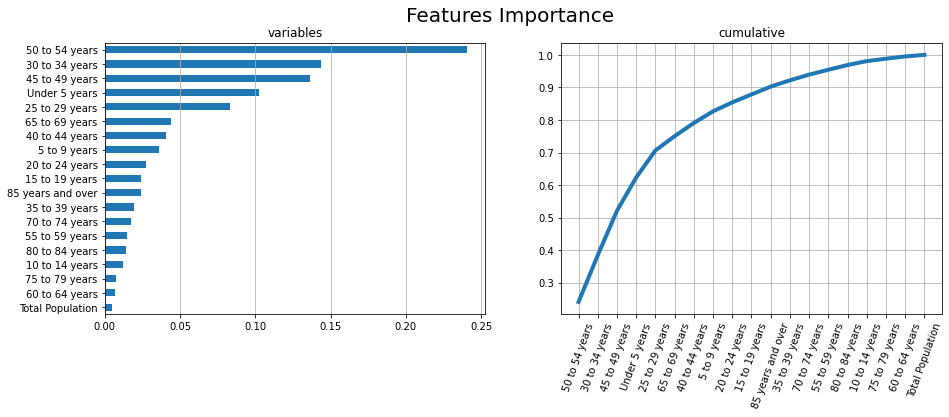

In [24]:
#Ensemble Methods
X = df_train.drop(y, axis=1).values
Y = df_train[y].values
feature_names = df_train.drop(y, axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,Y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15,5))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables') 
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [25]:
#Sheet1
X_names = ['50 to 54 years',
            '45 to 49 years',
            '20 to 24 years',
            'Total Population']

#Sheet2
# X_names = ['Longitude',
#             'Latitude',
#             '40 to 49 years',
#             '50 to 59 years',
#             'Average Age',
#             'Total Population']

# Sheet3
# X_names = ['40 to 59 years',
#             '20 to 39 years',
#             '80 years and over',
#             'Latitude', 
#             'Longitude',
#             'Average Unemployment Rate',
#             'Average Age',
#             'Total Population']
            
X_train = X_train[X_names].values
y_train = y_train[y].values

X_test = X_test[X_names].values
y_test = y_test[y].values

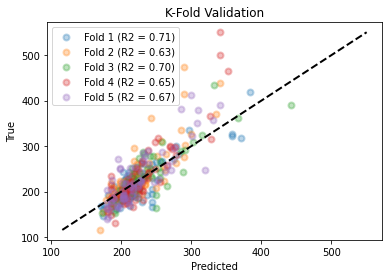

In [26]:
## call model
# model = linear_model.LinearRegression()
model = GBR()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [27]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

Evaluation

In [28]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.10f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.10f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.10f}".format(max_error))

R2 (explained variance): 0.87
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.07
Mean Absolute Error (Σ|y-pred|/n): 16.8452847812
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 21.9725724719
Max Error: -76.0113455819


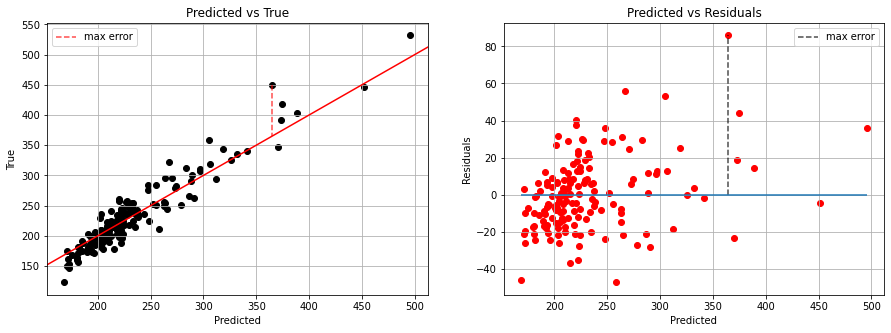

In [15]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

c:\Users\jerem\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


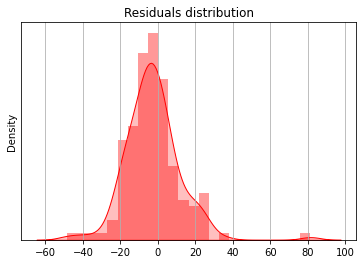

In [123]:
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

Explainability

In [132]:
print("True:", "{:,.10f}".format(y_test[39]), "--> Pred:", "{:,.10f}".format(predicted[39]))

True: 180.6425000000 --> Pred: 182.7733365806


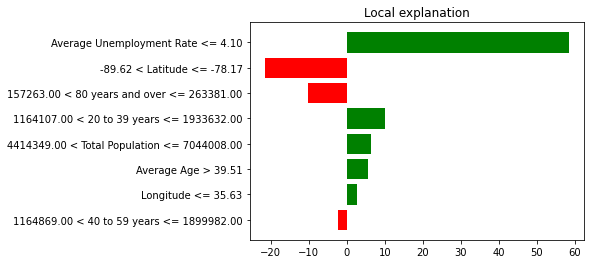

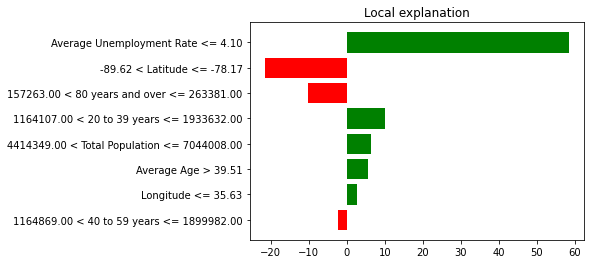

In [133]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names="Y", mode="regression")
explained = explainer.explain_instance(X_test[1], model.predict, num_features=10)
explained.as_pyplot_figure()